In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
with open('adult.names') as fp:
    cols = []
    for line in fp:
        sre = re.match(r'(?P<colname>[a-z\-]+):.*\.', line)
        if sre:
            cols.append(sre.group('colname'))
    cols.append('label')

options = {'header': None, 'names': cols, 'skipinitialspace': True}

train_df = pd.read_csv('adult.data', **options)

test_df = pd.read_csv('adult.test', skiprows=1, **options)
test_df['label'] = test_df['label'].str.rstrip('.')

train_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Mengganti missing values '?' menjadi NAN
train_df = train_df.replace('?', np.nan)

In [5]:
# Membersihkan kolom label dari spasi
train_df['label'] = train_df['label'].str.strip()


In [6]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'label']
for col in categorical_columns:
    train_df[col] = train_df[col].astype('category')

In [7]:
train_df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [8]:
# Drop baris yang memiliki missing values
train_df = train_df.dropna()

In [9]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  category
 2   fnlwgt          30162 non-null  int64   
 3   education       30162 non-null  category
 4   education-num   30162 non-null  int64   
 5   marital-status  30162 non-null  category
 6   occupation      30162 non-null  category
 7   relationship    30162 non-null  category
 8   race            30162 non-null  category
 9   sex             30162 non-null  category
 10  capital-gain    30162 non-null  int64   
 11  capital-loss    30162 non-null  int64   
 12  hours-per-week  30162 non-null  int64   
 13  native-country  30162 non-null  category
 14  label           30162 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.9 MB


In [11]:
train_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## EDA

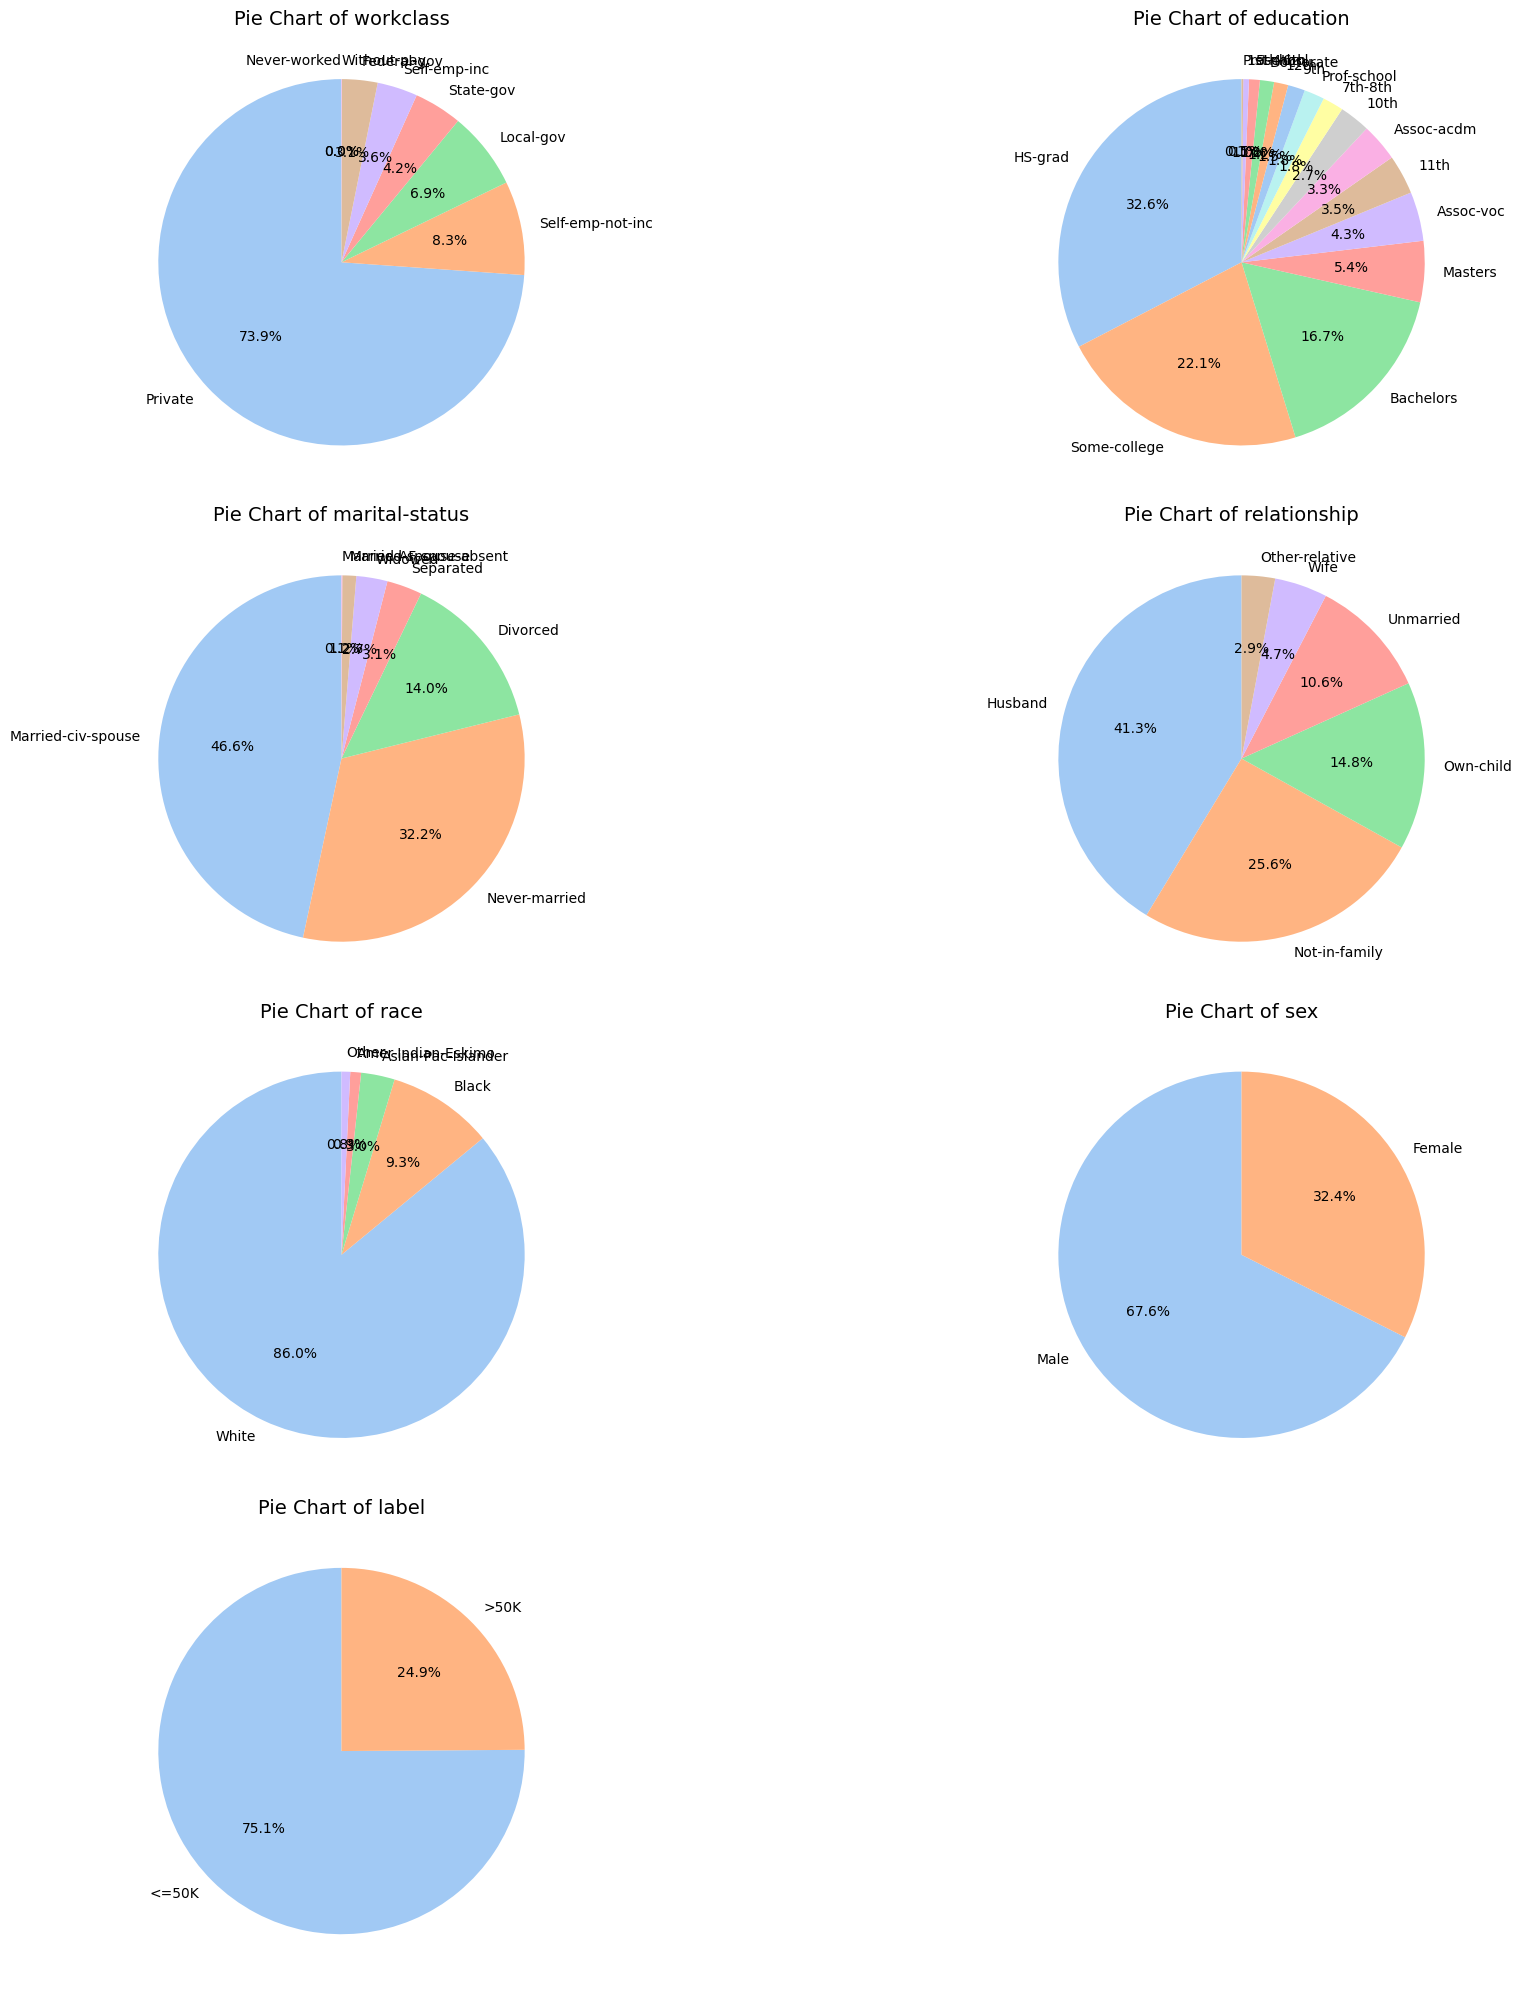

In [22]:
# PIE CHART: Proporsi dari fitur kategorikal
categorical_columns = ['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex', 'label']
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    data = train_df[col].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {col}', fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-23-2d3c52721c77>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-2d3c52721c77>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-2d3c52721c77>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-2d3c52721c77>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-2d3c52721c77>:5: FutureWarning: 

Passing `palette

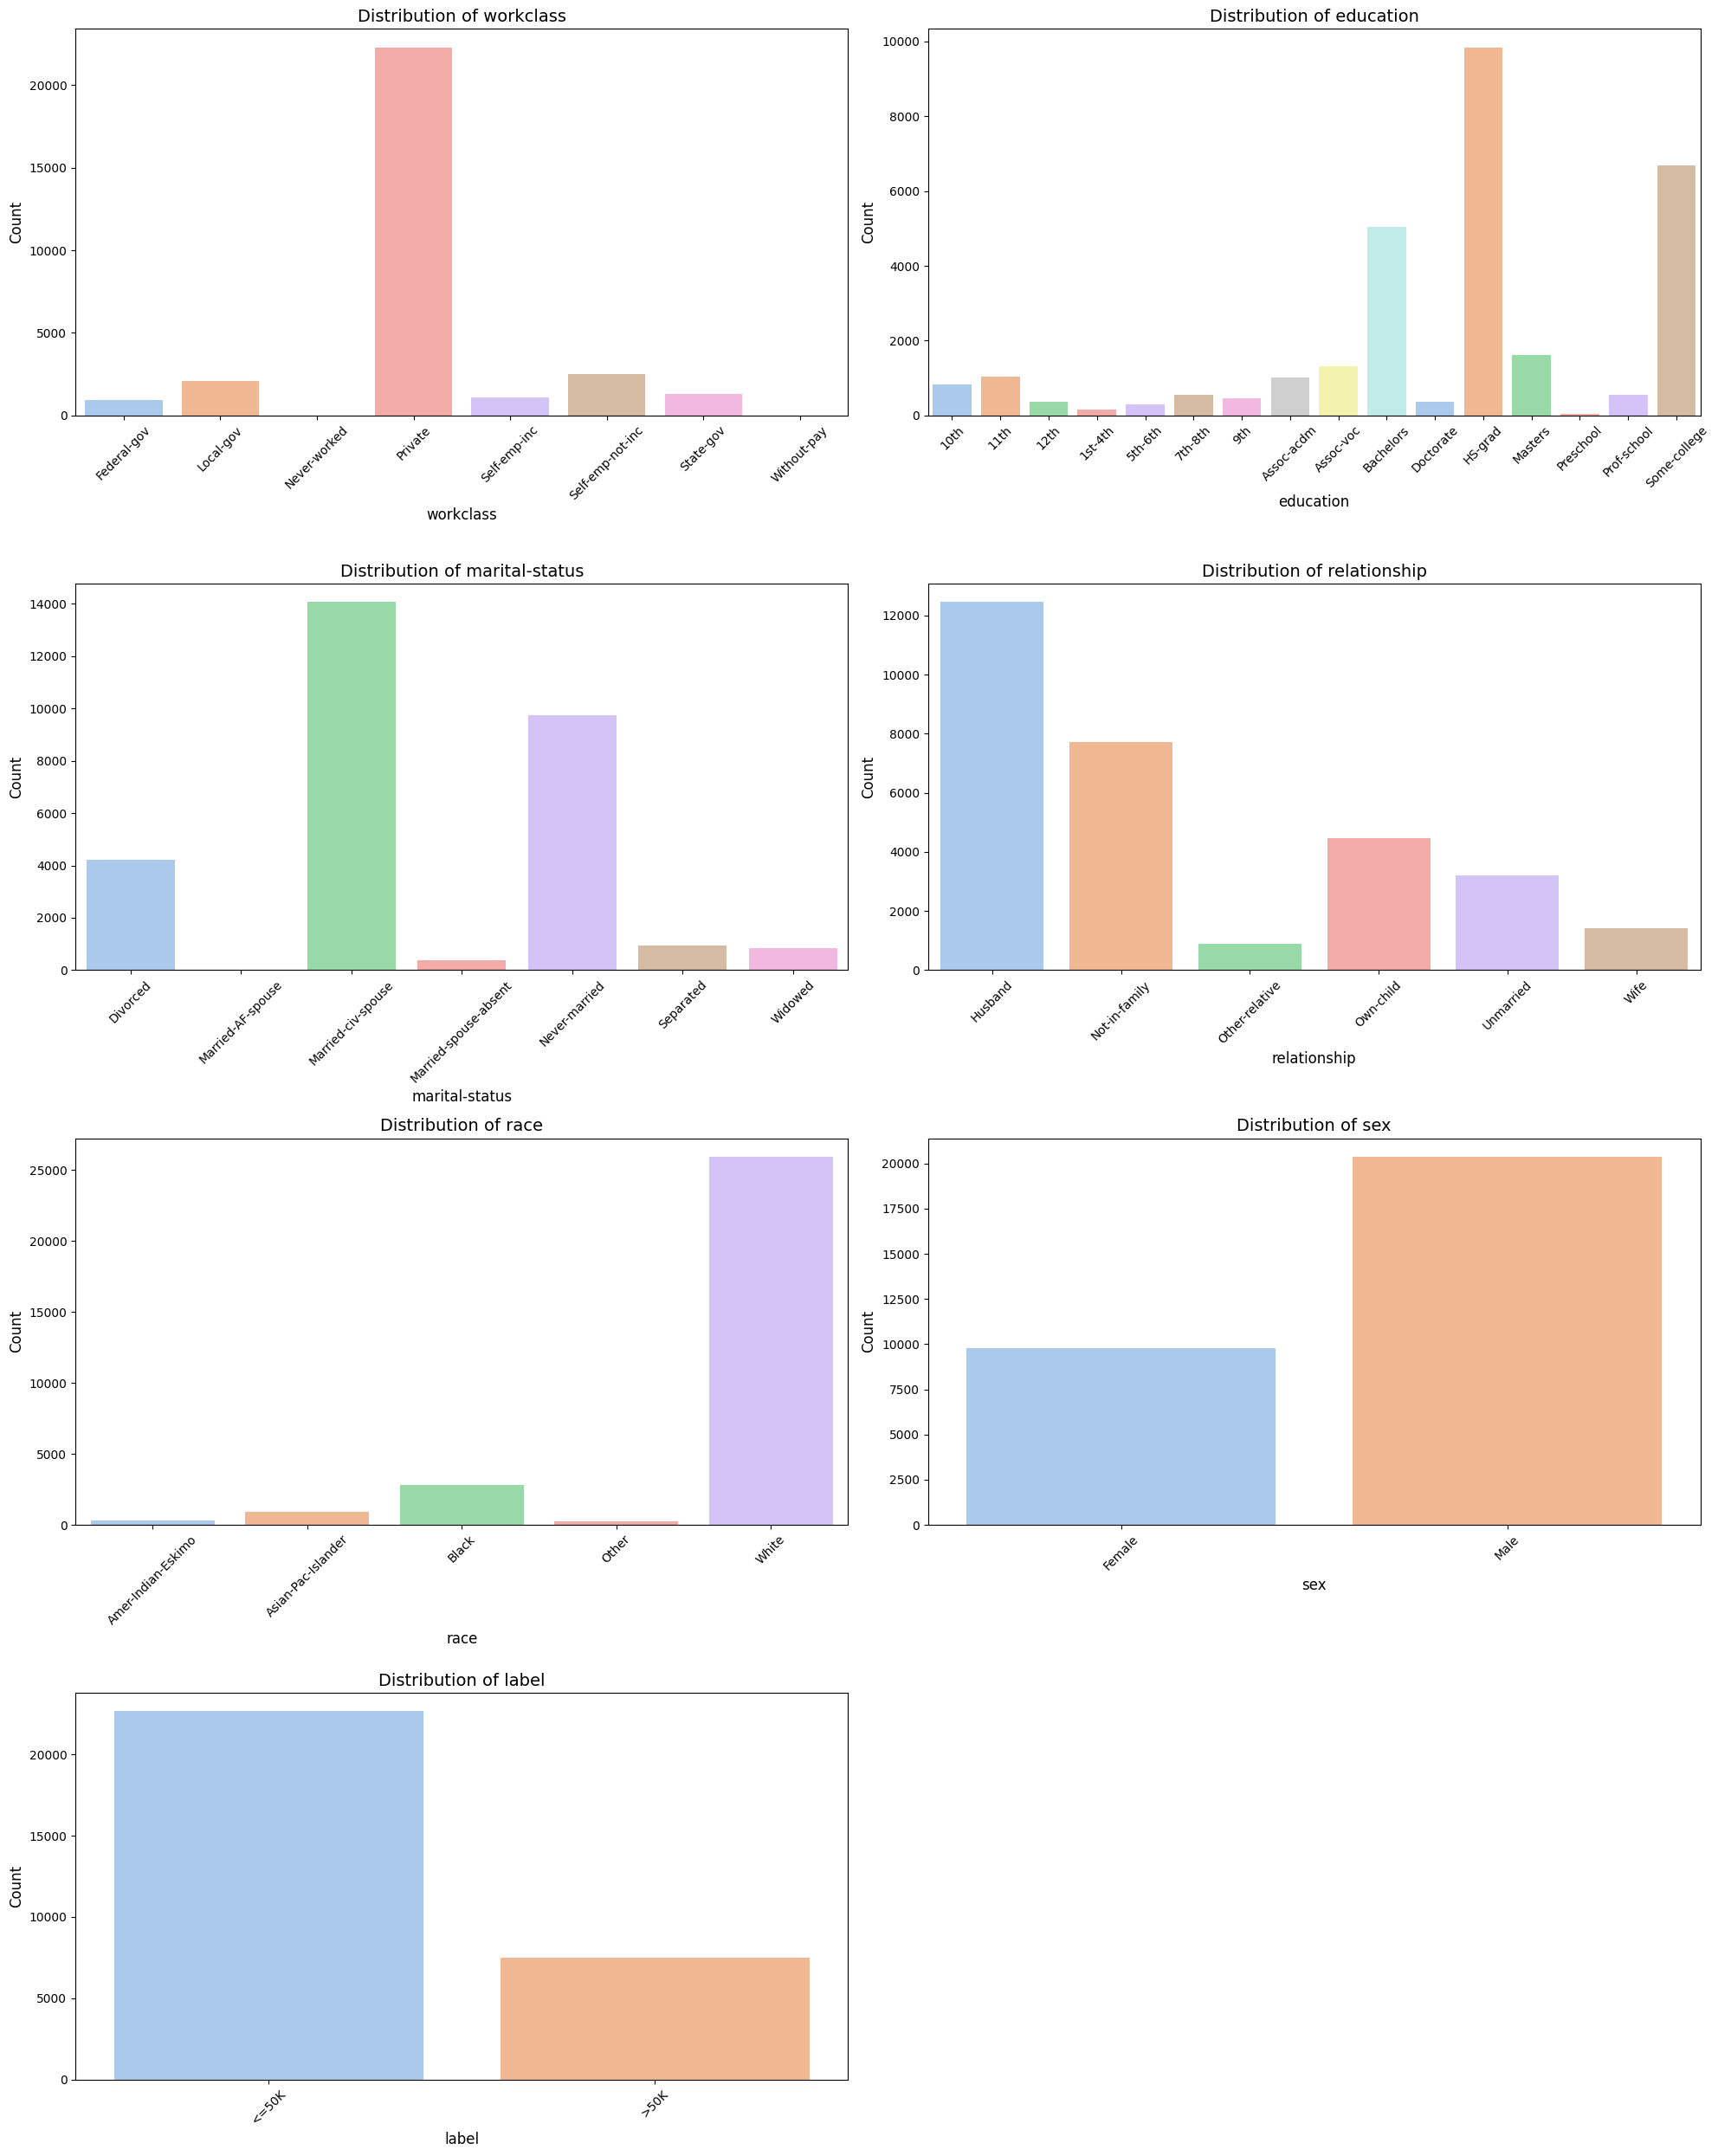

In [23]:
# BAR CHART: Distribusi kategori untuk fitur kategorikal
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.barplot(
        x=train_df[col].value_counts().index,
        y=train_df[col].value_counts().values,
        palette='pastel'
    )
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-24-2f6dd13684e8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_values = train_df.groupby('label')[numerical_columns].mean()


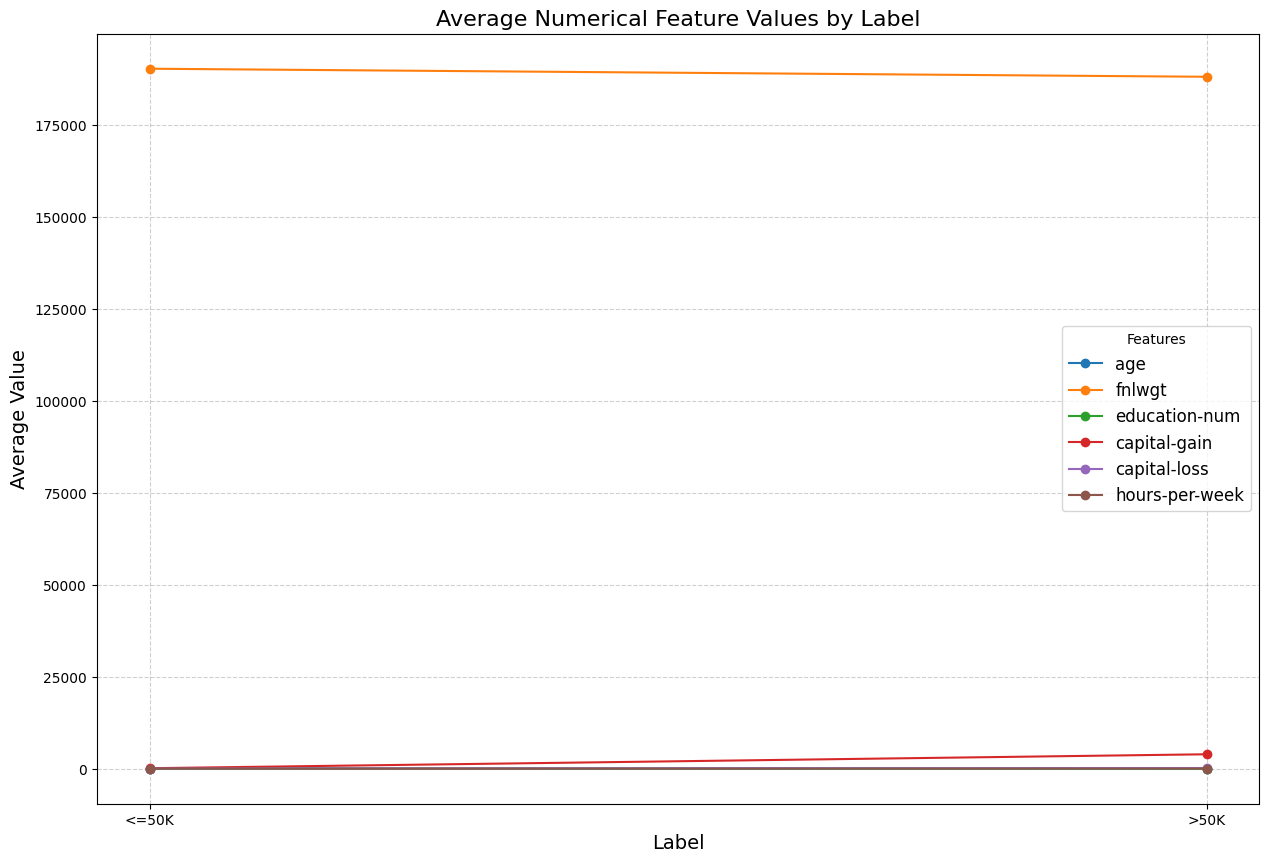

In [24]:
# LINE GRAPH: Tren nilai rata-rata fitur numerik per kategori
plt.figure(figsize=(15, 10))
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
avg_values = train_df.groupby('label')[numerical_columns].mean()

for col in numerical_columns:
    plt.plot(avg_values.index, avg_values[col], marker='o', label=col)

plt.title('Average Numerical Feature Values by Label', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title='Features', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

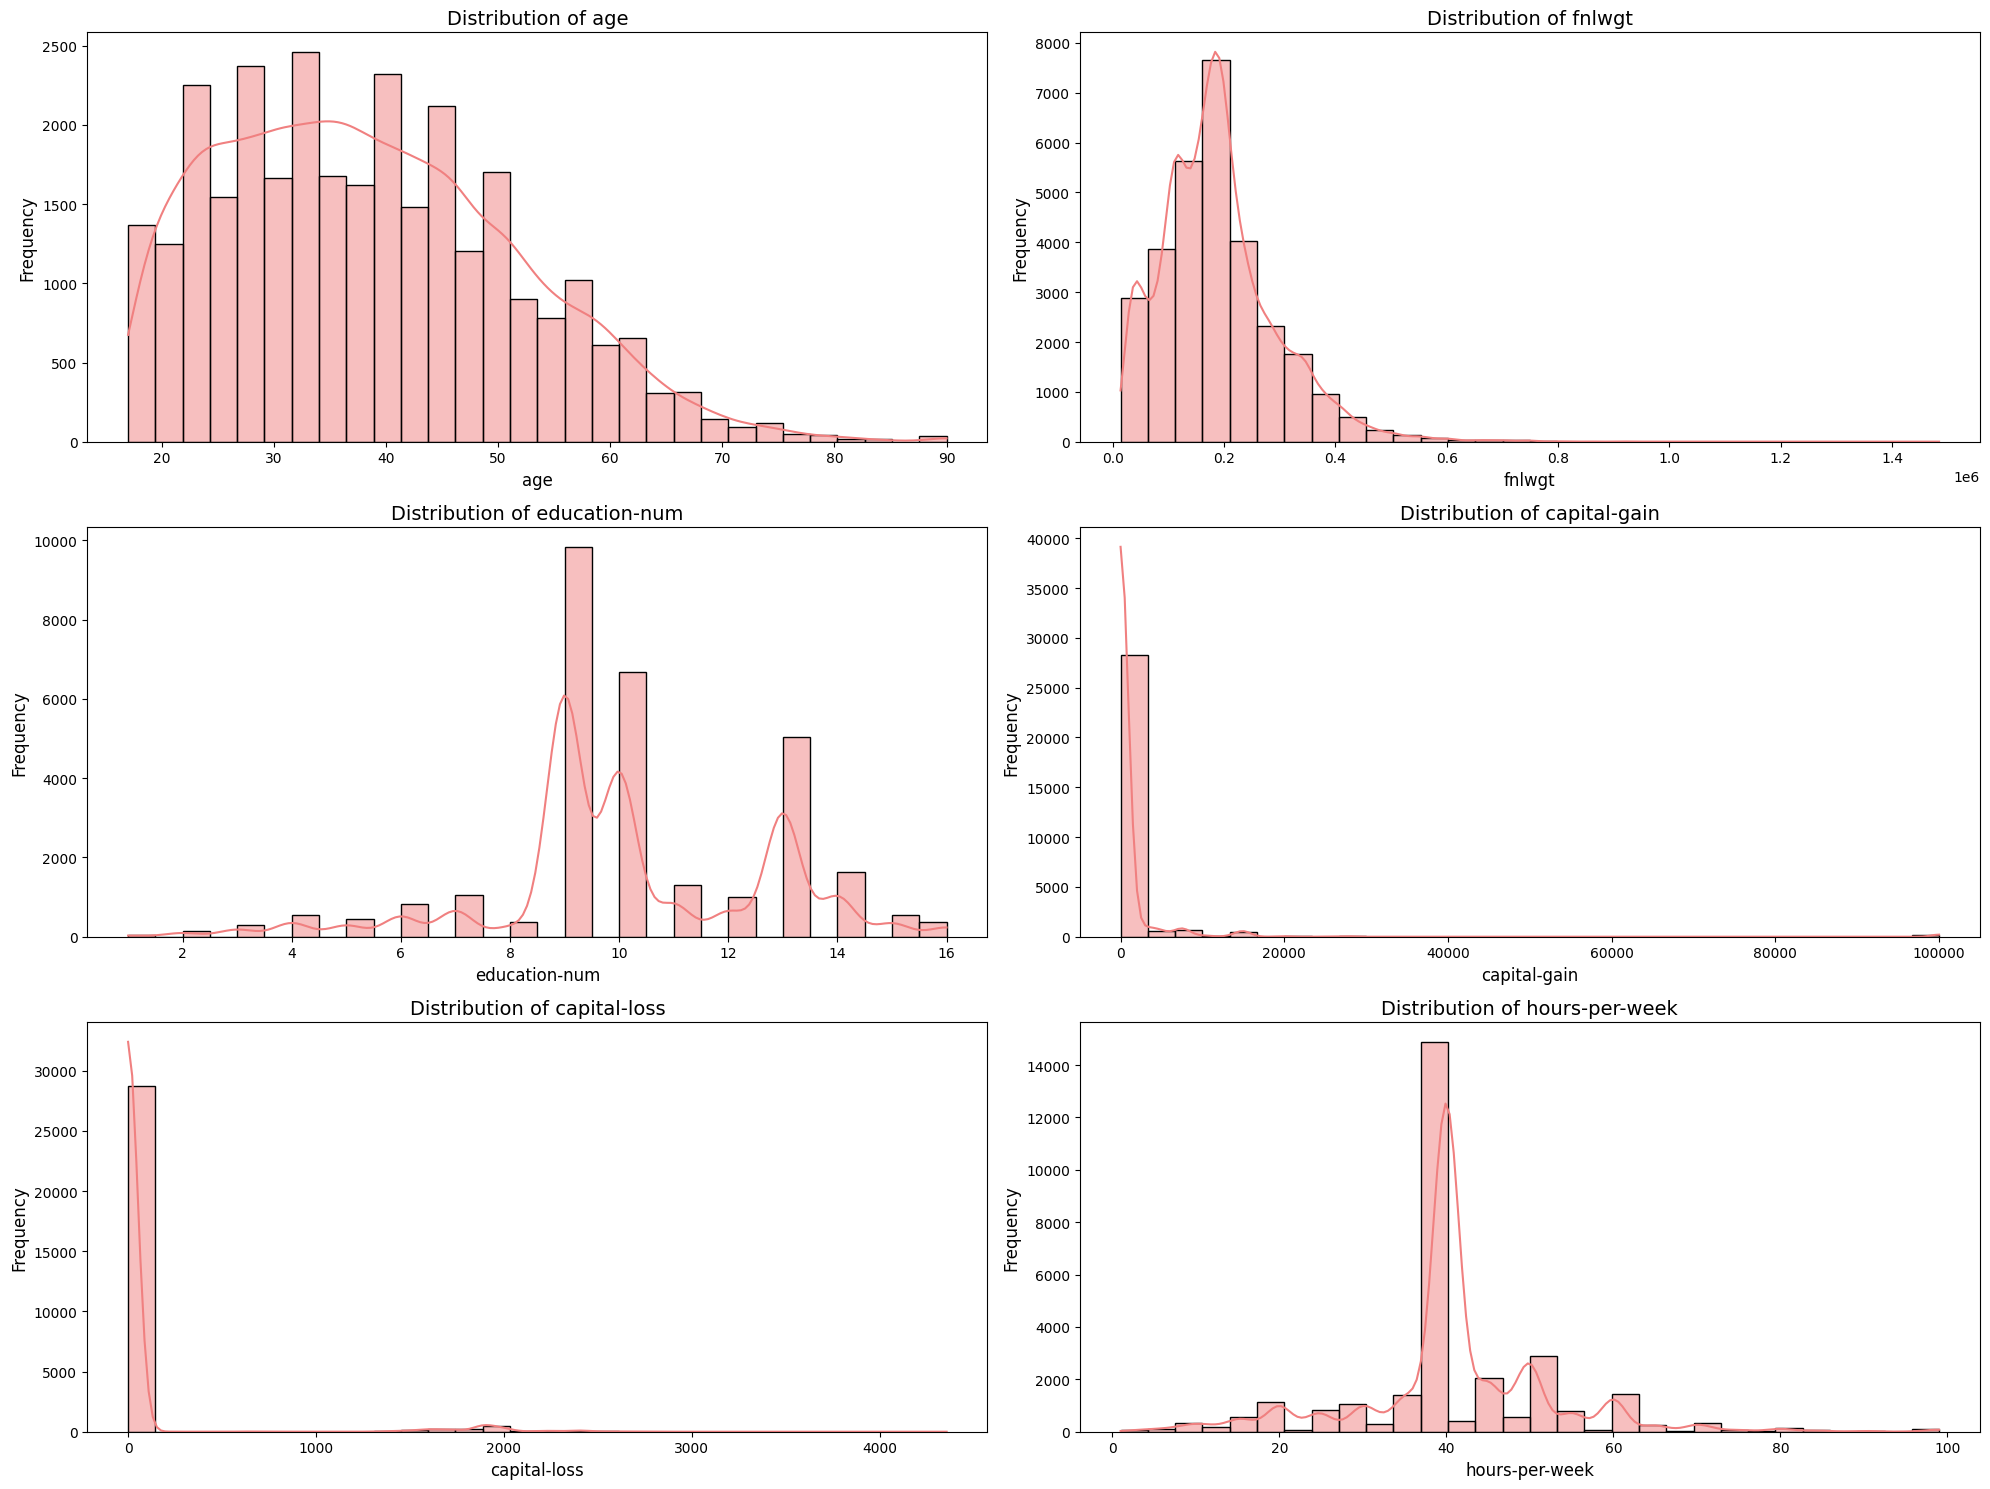

In [17]:
# Histogram untuk fitur numerik
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_df[col], kde=True, color='lightcoral', bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

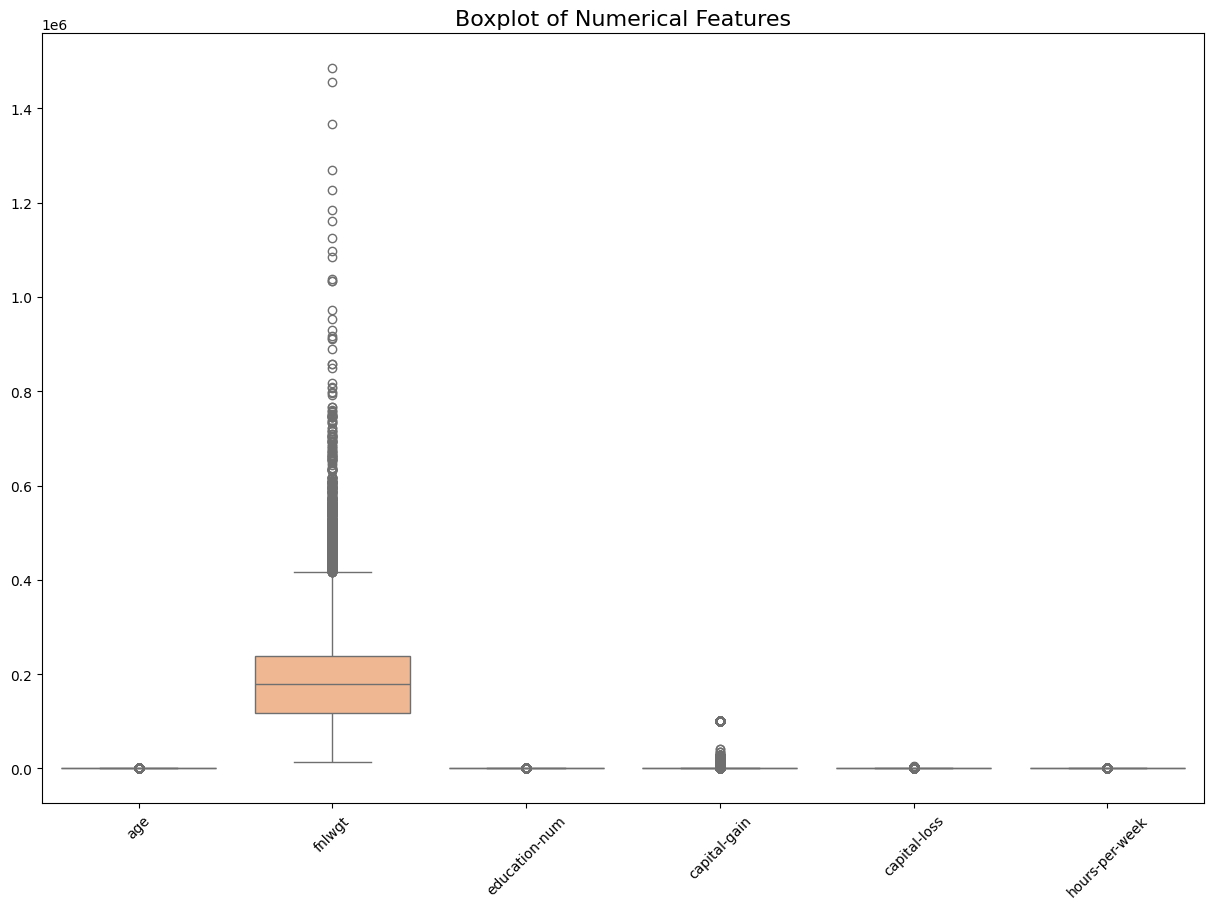

In [18]:
# Boxplot untuk fitur numerik (mendeteksi outlier)
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df[numerical_columns], palette='pastel')
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [30]:
# Menghitung matriks korelasi hanya untuk kolom numerik
corr_matrix = train_df.select_dtypes(include=np.number).corr()

# Menampilkan hasil korelasi dengan angka
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076511       0.043526      0.080154      0.060165   
fnlwgt         -0.076511  1.000000      -0.044992      0.000422     -0.009750   
education-num   0.043526 -0.044992       1.000000      0.124416      0.079646   
capital-gain    0.080154  0.000422       0.124416      1.000000     -0.032229   
capital-loss    0.060165 -0.009750       0.079646     -0.032229      1.000000   
hours-per-week  0.101599 -0.022886       0.152522      0.080432      0.052417   

                hours-per-week  
age                   0.101599  
fnlwgt               -0.022886  
education-num         0.152522  
capital-gain          0.080432  
capital-loss          0.052417  
hours-per-week        1.000000  


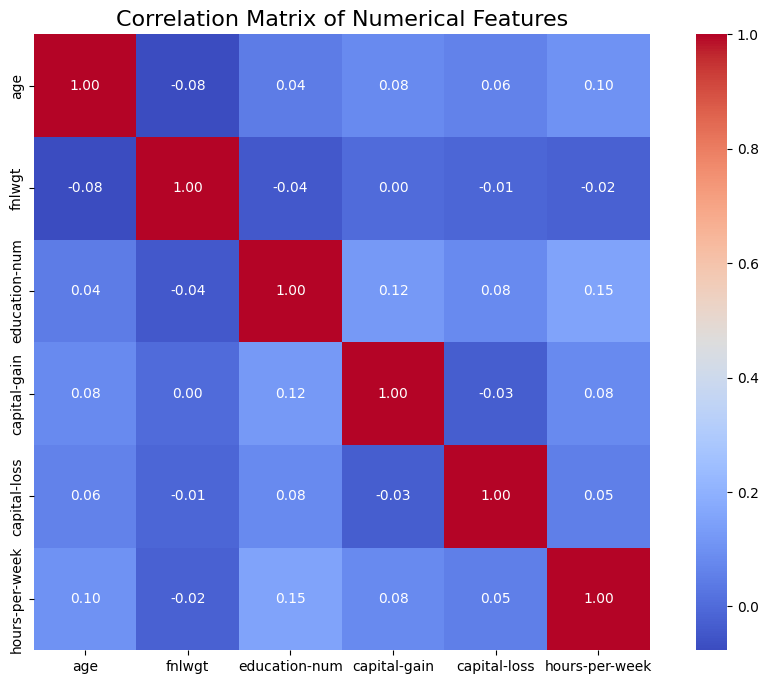

In [27]:
# Heatmap korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
corr_matrix = train_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## PIPELINE

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. Memisahkan fitur dan label
X = train_df.drop('label', axis=1)
y = train_df['label']

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 2. Identifikasi kolom numerik dan kategorikal
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# 3. Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scaling untuk fitur numerik
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encoding fitur kategorikal
    ]
)


In [36]:
# 5. Pipeline model
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 6. Training dan evaluasi
for name, model in models.items():
    print(f"Model: {name}")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocessing
        ('classifier', model)  # Model
    ])

    # Training
    pipeline.fit(X_train, y_train)

    # Prediksi
    y_pred = pipeline.predict(X_test)

    # Evaluasi
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("-" * 50)

Model: Logistic Regression
Confusion Matrix:
[[4204  327]
 [ 593  909]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4531
           1       0.74      0.61      0.66      1502

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033

Accuracy: 0.85
--------------------------------------------------
Model: Decision Tree
Confusion Matrix:
[[3938  593]
 [ 561  941]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4531
           1       0.61      0.63      0.62      1502

    accuracy                           0.81      6033
   macro avg       0.74      0.75      0.75      6033
weighted avg       0.81      0.81      0.81      6033

Accuracy: 0.81
--------------------------------------------------
Model: k-NN
Confusion Matrix

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:04:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[4226  305]
 [ 514  988]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4531
           1       0.76      0.66      0.71      1502

    accuracy                           0.86      6033
   macro avg       0.83      0.80      0.81      6033
weighted avg       0.86      0.86      0.86      6033

Accuracy: 0.86
--------------------------------------------------


## HYPERPARAMETER TUNING

In [37]:
from sklearn.model_selection import GridSearchCV

# 1. Definisikan parameter untuk setiap model
param_grid = {
    "Logistic Regression": {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    "Decision Tree": {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    "k-NN": {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    },
    "XGBoost": {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
}

# 2. Perform Hyperparameter Tuning dan evaluasi
best_models = {}

for name, model in models.items():
    print(f"Tuning Model: {name}")

    # Pipeline model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Grid Search
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    # Fit data
    grid_search.fit(X_train, y_train)

    # Best Model
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Evaluasi
    y_pred = best_model.predict(X_test)

    print("Best Parameters:", grid_search.best_params_)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("-" * 50)


Tuning Model: Logistic Regression
Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}
Confusion Matrix:
[[4207  324]
 [ 606  896]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4531
           1       0.73      0.60      0.66      1502

    accuracy                           0.85      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033

Accuracy: 0.85
--------------------------------------------------
Tuning Model: Decision Tree
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Confusion Matrix:
[[4249  282]
 [ 620  882]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4531
           1       0.76      0.59      0.66      1502

    accuracy                           0.85      6033


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:20:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}
Confusion Matrix:
[[4255  276]
 [ 533  969]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4531
           1       0.78      0.65      0.71      1502

    accuracy                           0.87      6033
   macro avg       0.83      0.79      0.81      6033
weighted avg       0.86      0.87      0.86      6033

Accuracy: 0.87
--------------------------------------------------
